<a href="https://colab.research.google.com/github/sujayrittikar/DeepLearning/blob/master/DeepNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
fashion = tf.keras.datasets.fashion_mnist

In [ ]:
(x_train, Y_train), (x_test, Y_test) = fashion.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Looking at the shapes of data
print("Shape of x train: ", x_train.shape)
print("Shape of Y train: ", Y_train.shape)
print("Shape of x test: ", x_test.shape)
print("Shape of Y test: ", Y_test.shape)

Shape of x train:  (60000, 28, 28)
Shape of Y train:  (60000,)
Shape of x test:  (10000, 28, 28)
Shape of Y test:  (10000,)


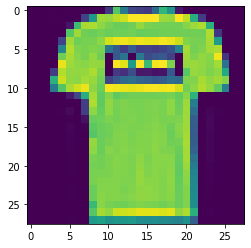

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.show()

In [ ]:
# Scaling the input feature data
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# Getting the data transformed in form of a 1D array to represent features of individual images
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

In [ ]:
# One-hot encoding the output variable
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [ ]:
# Building the Deep Neural Networks Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(784, )))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(optimizer="sgd", loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])

In [ ]:
# Fitting the model
fitted = model.fit(x=x_train, y=Y_train, batch_size=10, epochs=20, validation_split=0.25)

Epoch 1/20
4500/4500 [==============================] - 10s 2ms/step - loss: 0.6154 - acc: 0.7880 - val_loss: 0.4670 - val_acc: 0.8385
Epoch 2/20
4500/4500 [==============================] - 10s 2ms/step - loss: 0.4384 - acc: 0.8446 - val_loss: 0.4232 - val_acc: 0.8477
Epoch 3/20
4500/4500 [==============================] - 9s 2ms/step - loss: 0.3958 - acc: 0.8594 - val_loss: 0.3792 - val_acc: 0.8638
Epoch 4/20
4500/4500 [==============================] - 10s 2ms/step - loss: 0.3692 - acc: 0.8660 - val_loss: 0.3786 - val_acc: 0.8689
Epoch 5/20
4500/4500 [==============================] - 9s 2ms/step - loss: 0.3489 - acc: 0.8737 - val_loss: 0.3762 - val_acc: 0.8667
Epoch 6/20
4500/4500 [==============================] - 9s 2ms/step - loss: 0.3339 - acc: 0.8780 - val_loss: 0.3624 - val_acc: 0.8709
Epoch 7/20
4500/4500 [==============================] - 11s 2ms/step - loss: 0.3191 - acc: 0.8838 - val_loss: 0.3471 - val_acc: 0.8767
Epoch 8/20
4500/4500 [==============================] - 9s

In [ ]:
# Predicting values for test set
predictions = model.predict(x_test)

In [ ]:
model.evaluate(x=x_test, y=Y_test, batch_size=10)

1000/1000 [==============================] - 1s 1ms/step - loss: 0.3392 - acc: 0.8809


[0.3391932249069214, 0.8809000253677368]

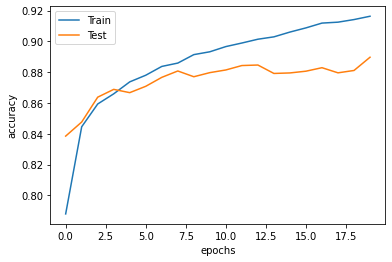

In [ ]:
plt.plot(fitted.history['acc'])
plt.plot(fitted.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

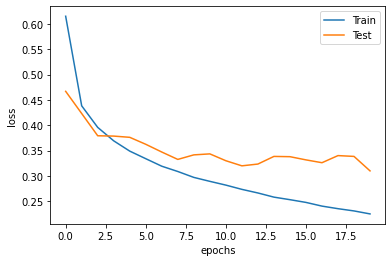

In [ ]:
plt.plot(fitted.history['loss'])
plt.plot(fitted.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()